**ÉXITO DE PELÍCULAS**

En este proyecto de Data Science, se busca desarrollar un modelo supervisado de clasificación binaria para predecir si una película logrará alcanzar un box office que sea al menos el doble de su presupuesto de producción. Este tipo de predicción es importante en la industria cinematográfica, donde la rentabilidad de una película es un factor determinante en la toma de decisiones de producción, marketing y distribución.

Para ello, se utilizará un dataset que contiene 13 columnas (x categóricas y x numéricas) con información relevante sobre las películas, como el director, actores, presupuesto, género, duración, año de lanzamiento, calificación en IMDb, y otros factores que podrían influir en el rendimiento financiero de las mismas. El objetivo del modelo es identificar patrones y características comunes en las películas, lo que permitirá predecir con mayor precisión el desempeño de futuras producciones en términos de taquilla.

El dataset será analizado mediante técnicas de exploración de datos (EDA) para identificar las relaciones más importantes entre las variables y la variable objetivo, que en este caso es una etiqueta binaria que indica si la película alcanzará un box office superior al doble de su presupuesto. El análisis exploratorio también permitirá seleccionar y transformar las características más relevantes para mejorar el rendimiento del modelo.

Se considerarán varios algoritmos de clasificación, como árboles de decisión y KNN, para determinar cuál se ajusta mejor al problema planteado. Para la selección del modelo se evaluarán distintas métricas de desempeño como la precisión, la sensibilidad, y la curva ROC-AUC, con el fin de identificar el enfoque más adecuado. El objetivo final es desarrollar un modelo robusto que pueda ser aplicado para predecir el éxito potencial de futuras películas antes de su estreno, lo que podría ser de gran valor para los estudios cinematográficos en la planificación de sus inversiones.

**PREGUNTAS**

¿Qué características (género, duración, calificación, etc.) tienen mayor influencia en el éxito de una película en términos de su box office?

¿Si un director trabajó en varias películas, si o si va a superar con creces el presupuesto utilizado?

¿Existe una relación significativa entre el presupuesto de la película y su rendimiento en taquilla?

¿Cómo afectan las calificaciones de la película en plataformas como IMDb al éxito financiero de la misma?

¿El rendimiento previo del director y los actores de una película afecta significativamente el rendimiento actual?


**HIPÓTESIS**

Las películas con mayores presupuestos tienen más probabilidades de duplicar su inversión en box office.

Si un director trabajó en muchas películas, obtendrá box offices que superen por el doble al presupuesto.

Los géneros como la acción y la aventura tienden a ser más rentables que otros géneros.

Las películas con mejores críticas y calificaciones tienen más probabilidades de superar el doble de su presupuesto en box office.

El rendimiento previo del director y los actores de una película afecta significativamente el éxito en taquilla de la película actual.



In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)), sep=',', encoding='latin1')

In [ ]:
print(df.columns)

Index(['Película', 'Director', 'Duración', 'Actor 1', 'Actor 2', 'Actor 3',
       'Género', 'Presupuesto', 'Box Office', 'Actors Box Office %',
       'Director Box Office %', 'Ganancias',
       'Nominaciones Oscar y Globos de Oro', 'Premios Oscar y Globos de Oro',
       'Año de estreno', 'Puntaje IMDB'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt

**P: ¿Si un director trabajó en varias películas, si o si va a superar con creces el presupuesto utilizado?**

In [ ]:
peliculas_por_director = df['Director'].value_counts().head(10)  # Los 10 directores con más películas

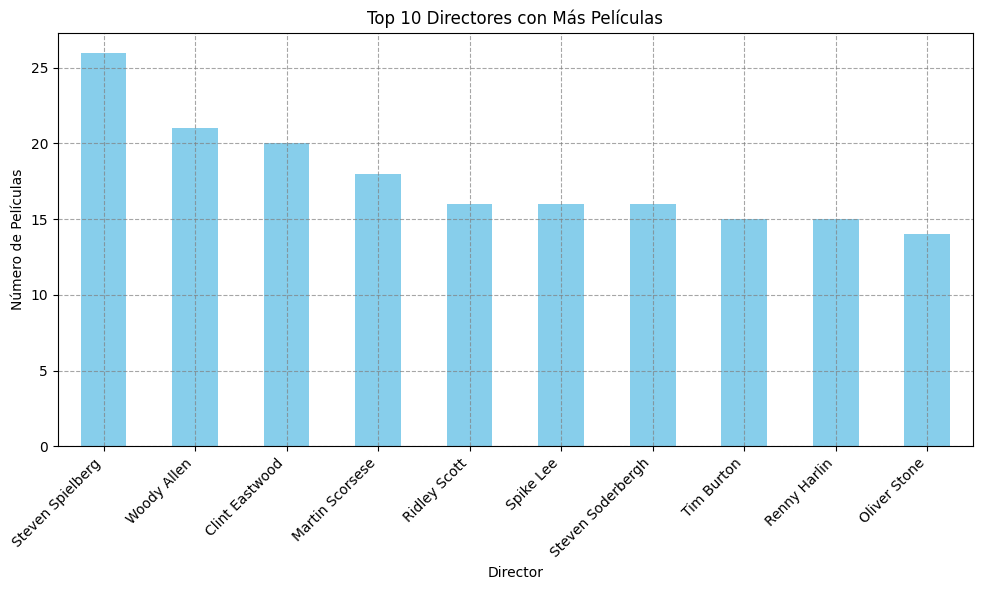

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
peliculas_por_director.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Top 10 Directores con Más Películas')
plt.xlabel('Director')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

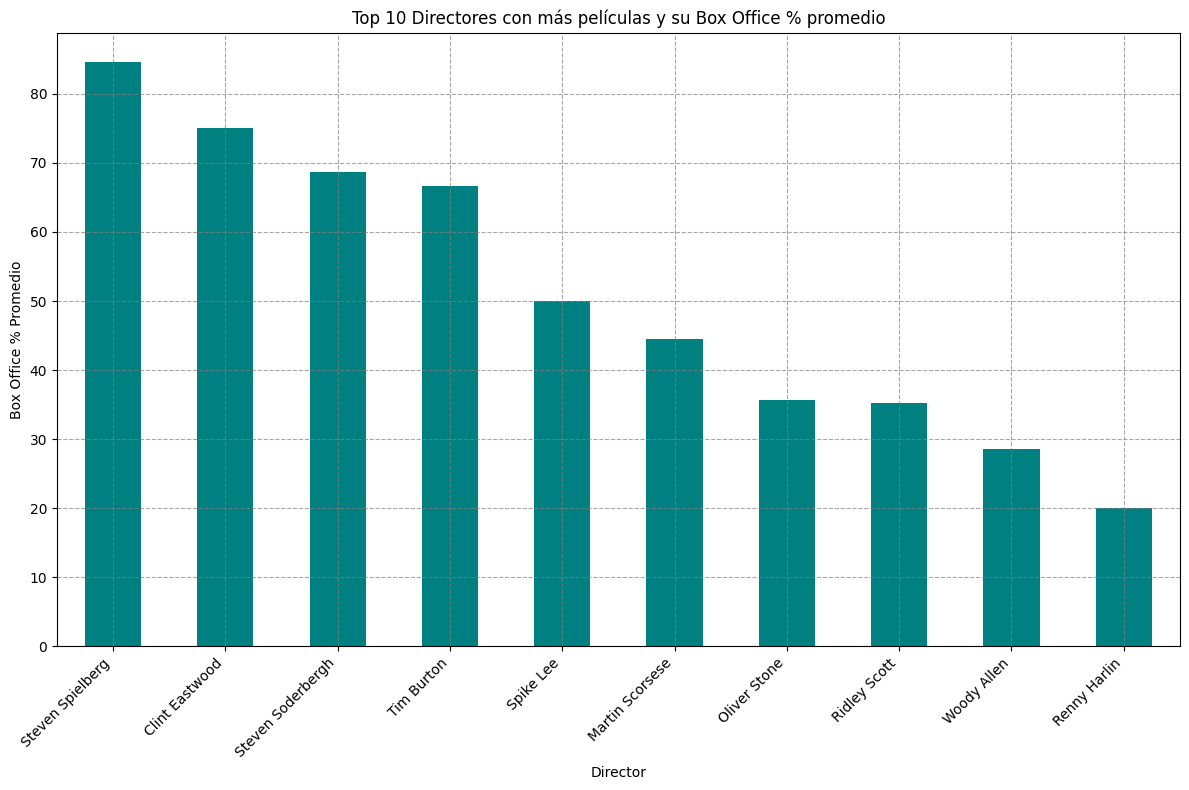

In [ ]:
df_top_10_directores = df[df['Director'].isin(top_10_directores)]

# Ordenar los directores por 'Director Box Office %'
directores_box_office = directores_box_office.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
directores_box_office.plot(kind='bar', color='teal')

# Personalizar el gráfico
plt.title('Top 10 Directores con más películas y su Box Office % promedio')
plt.xlabel('Director')
plt.ylabel('Box Office % Promedio')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

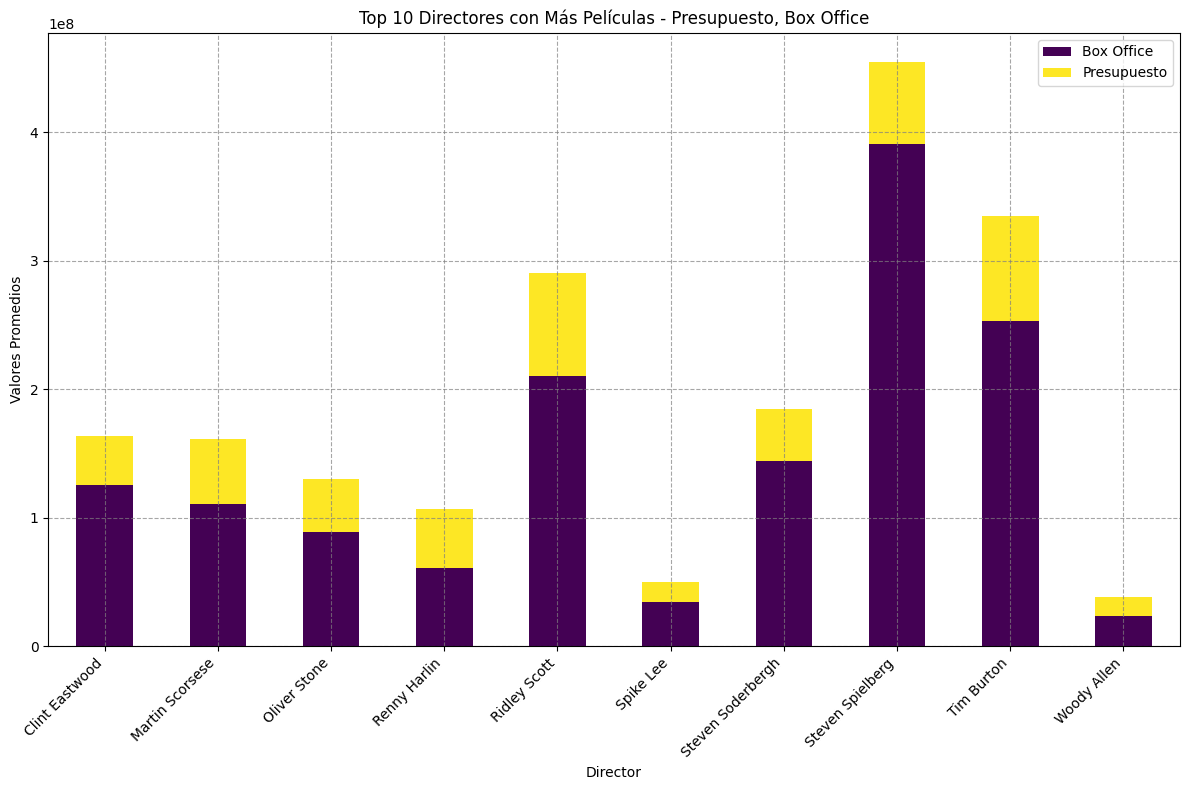

In [ ]:

# Agrupar por director y calcular la media de 'Box Office', 'Presupuesto', y 'Duración'
directores_agrupados = df_top_10_directores.groupby('Director').agg({
    'Box Office': 'mean',
    'Presupuesto': 'mean'
})

# Crear el gráfico de barras apiladas
directores_agrupados.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Top 10 Directores con Más Películas - Presupuesto, Box Office')
plt.xlabel('Director')
plt.ylabel('Valores Promedios')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # Añadir cuadrícula

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Como se puede observar en los gráficos de arriba, que un director haya dirigido varias películas no significa que si o si va a tener buenos resultados financieros.
Por ejemplo, si observamos lo obtenido para Woody Allen podemos ver que en el dataset hay más de 20 películas de este famoso director, sin embargo, su porcentaje de películas que superaron el doble su presupuesto es de un poco más de 25%.

**P: ¿Qué características (género, duración, calificación) tienen mayor influencia en el éxito de una película en términos de su box office?**

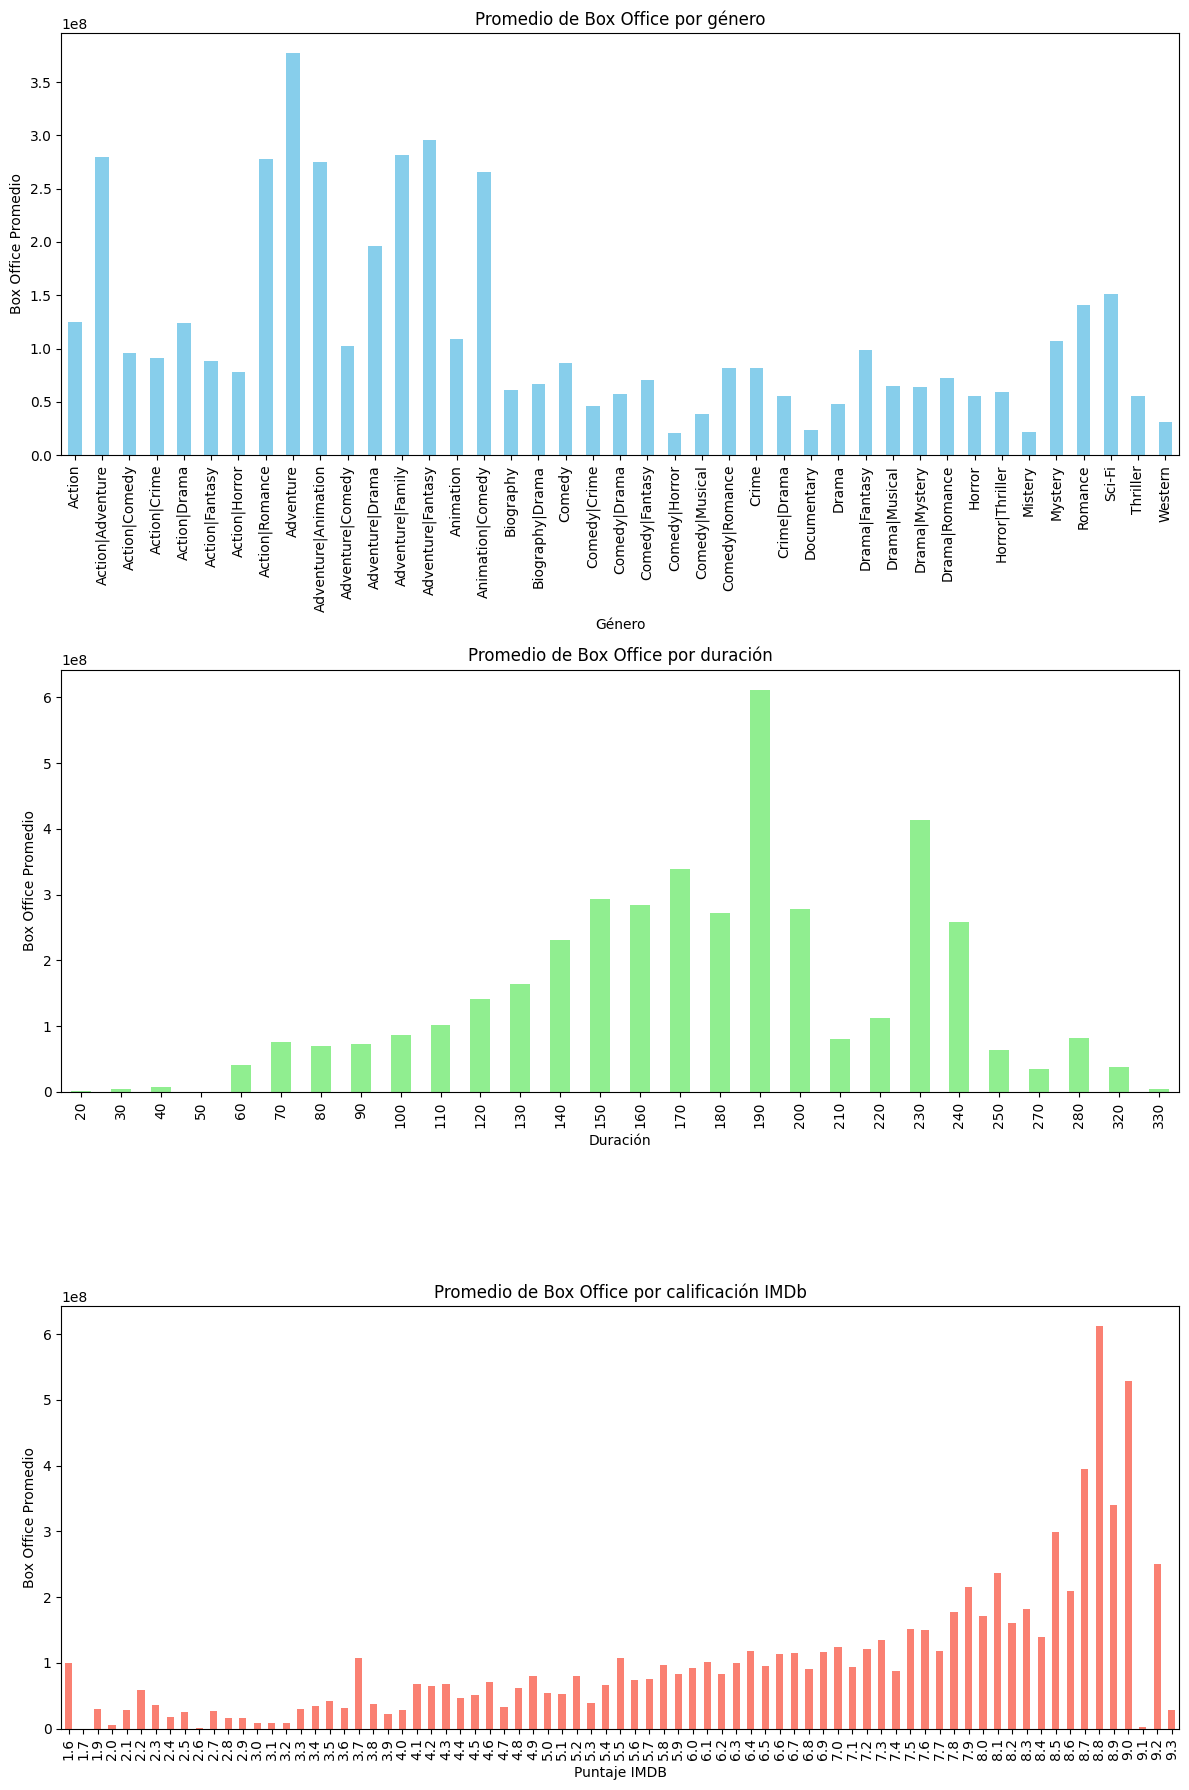

In [ ]:
# Promedio de Box Office por género
box_office_por_genero = df.groupby('Género')['Box Office'].mean()

# Promedio de Box Office por duración (en intervalos de 10 minutos)
df['Duración (Intervalos de 10 min)'] = (df['Duración'] // 10) * 10
box_office_por_duracion = df.groupby('Duración (Intervalos de 10 min)')['Box Office'].mean()

# Promedio de Box Office por calificación IMDb
box_office_por_calificacion = df.groupby('Puntaje IMDB')['Box Office'].mean()

# Crear la figura y ejes
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico de Box Office por género
box_office_por_genero.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Promedio de Box Office por género')
ax[0].set_xlabel('Género')
ax[0].set_ylabel('Box Office Promedio')

# Gráfico de Box Office por duración
box_office_por_duracion.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Promedio de Box Office por duración')
ax[1].set_xlabel('Duración')
ax[1].set_ylabel('Box Office Promedio')

# Gráfico de Box Office por calificación IMDb
box_office_por_calificacion.plot(kind='bar', ax=ax[2], color='salmon')
ax[2].set_title('Promedio de Box Office por calificación IMDb')
ax[2].set_xlabel('Puntaje IMDB')
ax[2].set_ylabel('Box Office Promedio')

plt.tight_layout()
plt.show()

Estas 3 características parecen influenciar en los resultados que se obtienen en el box office.
Los géneros de aventura, acción y animación suelen tener buenos resultados en promedio, esto puede deberse a que generalmente son películas para todas las edades y suelen estrenarse en cines en varios países.

La duración debe pensarse desde otro punto de vista, ya que por ejemplo se ve un pico en la duración de 190 minutos, pero solo hay una película que entra ahí, por lo que esto no significa que si una película dura más va a tener mejores resultados. La mayoría de las películas se encuentran de 100 a 170 minutos.

Por último, se puede observar el puntaje IMDb junto a su promedio de box office. Se ve que aumenta a medida que los puntajes comienzan a subir desde 7.5 hasta 9. Los puntajes que se encuentran después se encuentran con un promedio bajo principalmente debido a que hay pocas películas entre los mismos, por lo que si una tiene un box office bajo, ya afecta el box office significativamente.


**P: ¿Existe una relación significativa entre el presupuesto de la película y su rendimiento en taquilla?**

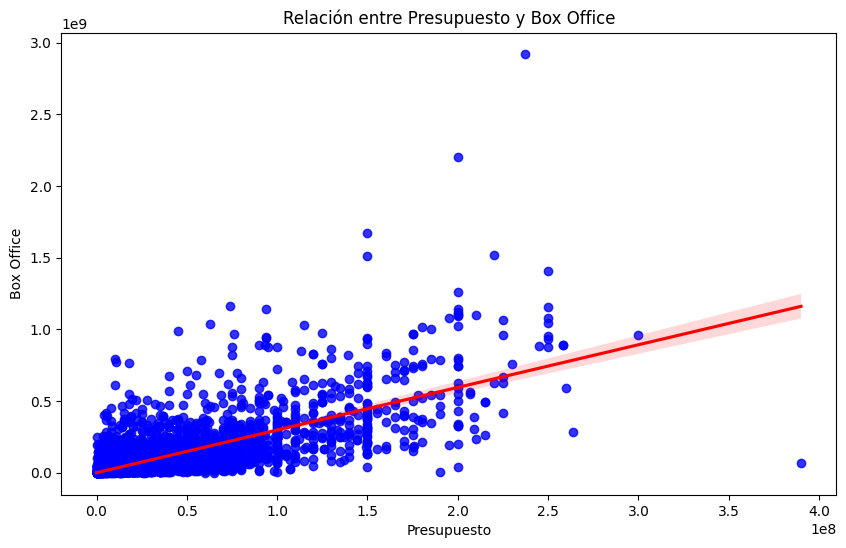

In [ ]:
import seaborn as sns

# Crear gráfico de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Presupuesto', y='Box Office', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Personalizar el gráfico
plt.title('Relación entre Presupuesto y Box Office')
plt.xlabel('Presupuesto')
plt.ylabel('Box Office')

plt.show()

Existe una tendencia general a que las películas con mayor presupuesto generen mayores ingresos en taquilla. Es decir, a mayor inversión, mayores ganancias potenciales.
Dispersión de los datos: Sin embargo, no todas las películas siguen esta tendencia de manera exacta. Hay casos de películas de bajo presupuesto que han sido grandes éxitos comerciales, y viceversa.

**¿Cómo afectan las calificaciones de la película en plataformas como IMDb al éxito financiero de la misma?**

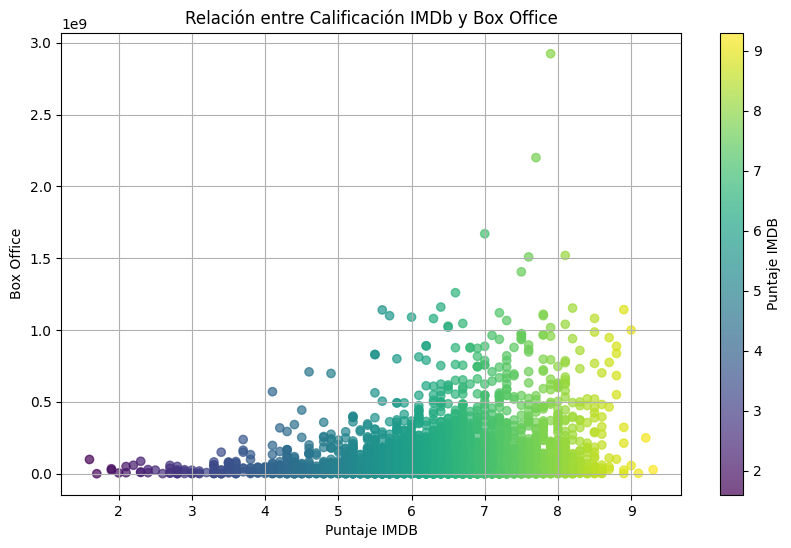

In [ ]:
# Crear el gráfico de dispersión con color según el puntaje IMDb
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Puntaje IMDB'], df['Box Office'], c=df['Puntaje IMDB'], cmap='viridis', alpha=0.7)

# Añadir una barra de colores
plt.colorbar(scatter, label='Puntaje IMDB')

# Personalizar el gráfico
plt.title('Relación entre Calificación IMDb y Box Office')
plt.xlabel('Puntaje IMDB')
plt.ylabel('Box Office')
plt.grid(True)

plt.show()

A simple vista, no se observa una relación lineal clara entre la calificación IMDb y la recaudación. Esto significa que una película con una calificación alta no necesariamente tendrá una taquilla muy alta, y viceversa.
Dispersión de los datos: Los puntos están bastante dispersos en todo el gráfico, lo que indica una gran variabilidad en los resultados. Hay películas con calificaciones altas y bajas recaudaciones, y viceversa.

**¿El rendimiento previo del director y los actores de una película afecta significativamente el rendimiento actual?**

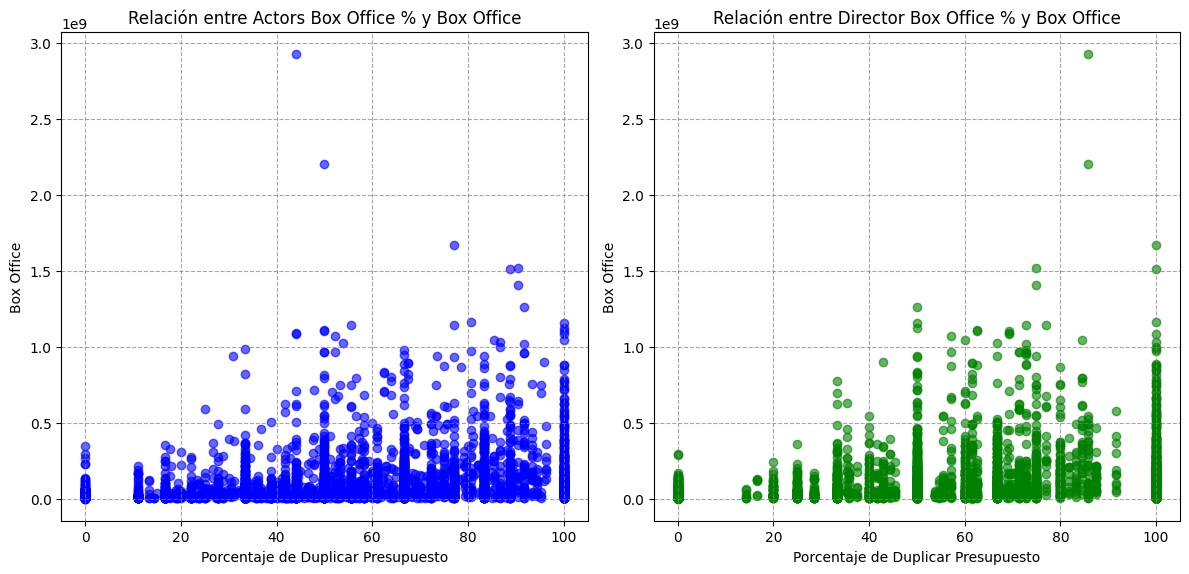

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para el rendimiento de los actores
plt.subplot(1, 2, 1)
plt.scatter(df['Actors Box Office %'], df['Box Office'], alpha=0.6, color='blue')
plt.title('Relación entre Actors Box Office % y Box Office')
plt.xlabel('Porcentaje de Duplicar Presupuesto')
plt.ylabel('Box Office')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Gráfico de dispersión para el rendimiento del director
plt.subplot(1, 2, 2)
plt.scatter(df['Director Box Office %'], df['Box Office'], alpha=0.6, color='green')
plt.title('Relación entre Director Box Office % y Box Office')
plt.xlabel('Porcentaje de Duplicar Presupuesto')
plt.ylabel('Box Office')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

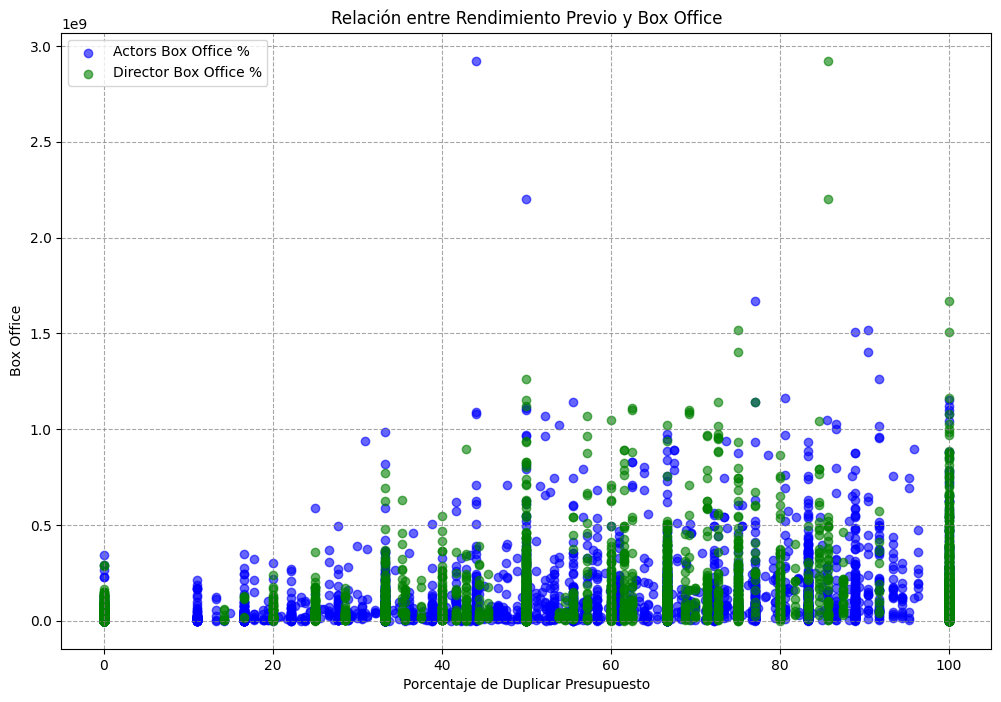

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))

# Graficar actores y directores en el mismo gráfico
plt.scatter(df['Actors Box Office %'], df['Box Office'], alpha=0.6, color='blue', label='Actors Box Office %')
plt.scatter(df['Director Box Office %'], df['Box Office'], alpha=0.6, color='green', label='Director Box Office %')

# Añadir leyenda y etiquetas
plt.title('Relación entre Rendimiento Previo y Box Office')
plt.xlabel('Porcentaje de Duplicar Presupuesto')
plt.ylabel('Box Office')
plt.legend()
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

plt.show()

En los gráficos sobre porcentaje de duplicar presupuesto respecto tanto a directores a actores se puede observar que existen casos donde es probable que si un director/actor tiene mucha fama esto va a ayudar a que el rendimiento de sus películas sea mejor. De todas maneras hay que tener en cuenta que son varios los factores que pueden afectar los box offices. Los directores y grupos de actores que tienen mayor número de películas no van a tener si o si buenos resultados, pero si tienen más posibilidades de hacerlo.
Hace unos gráficos atrás vimos los 10 directores con más películas, ahora observemos a los 20 actores con mayor número de cintas.

In [ ]:
# Combinar las columnas de actores en una sola serie
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Contar el número de películas por actor
actor_counts = actors.value_counts()

# Seleccionar los 20 actores con más películas
top_20_actors = actor_counts.head(20)

print(top_20_actors)

Robert De Niro        53
Morgan Freeman        42
Bruce Willis          38
Johnny Depp           37
Matt Damon            36
Steve Buscemi         34
Liam Neeson           33
Nicolas Cage          32
Brad Pitt             32
Denzel Washington     31
J.K. Simmons          30
Will Ferrell          30
Bill Murray           30
Harrison Ford         29
Tom Cruise            29
Robert Downey Jr.     29
Tom Hanks             28
Sylvester Stallone    27
Scarlett Johansson    27
Anthony Hopkins       27
Name: count, dtype: int64


<ipython-input-58-93e550430357>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Número de Películas', y='Actor', data=top_20_actors_df, palette='viridis')


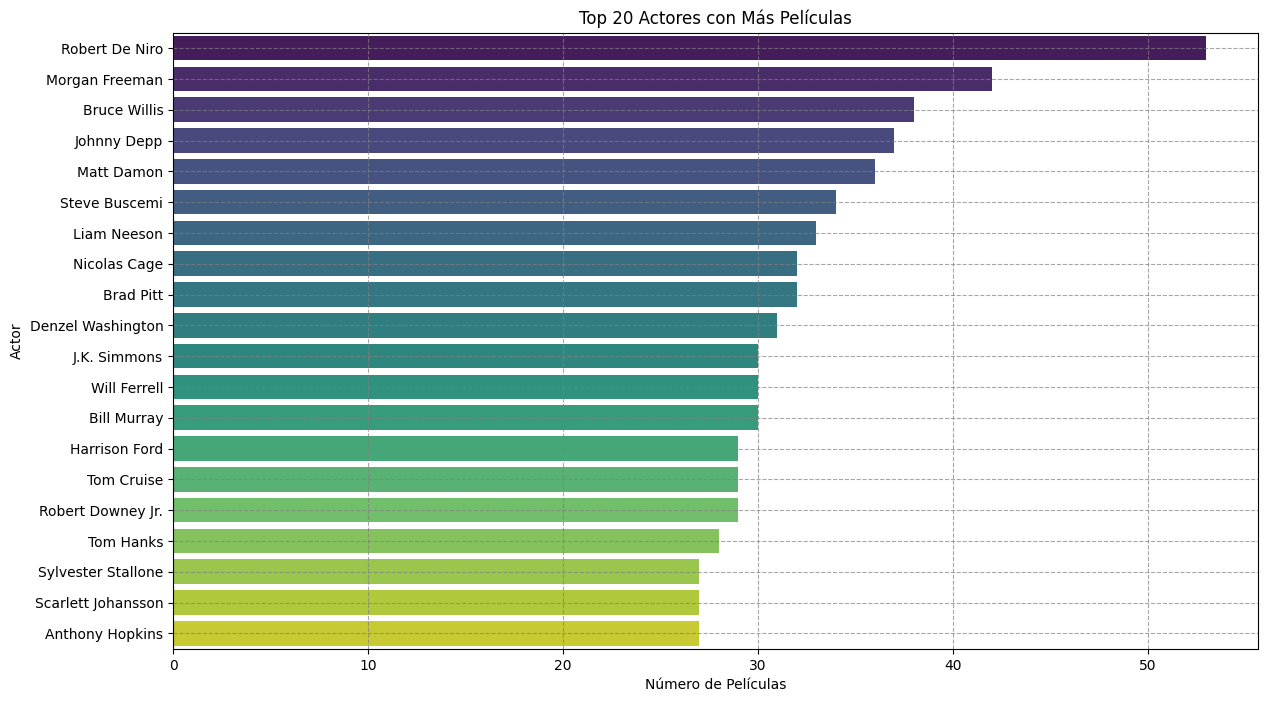

In [ ]:
top_20_actors_df = top_20_actors.reset_index()
top_20_actors_df.columns = ['Actor', 'Número de Películas']

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x='Número de Películas', y='Actor', data=top_20_actors_df, palette='viridis')
plt.title('Top 20 Actores con Más Películas')
plt.xlabel('Número de Películas')
plt.ylabel('Actor')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.show()

**VALORES PERDIDOS/INCORRECTOS**

Durante el armado de gráficos se encontraron valores erróneos que no fueron detectados previamente en la limpieza del dataset.
Para corregir esto se buscaron los index de las filas donde se debían realizar cambios y se hicieron las transformaciones correspondiente.
Por ejemplo:

In [ ]:
print(df.head())

index1 = df[df['Película'] == 'Code Name: The Cleaner'].index

print(df.loc[index1])

new_value = 75  # El nuevo valor que se quiere asignar
df.loc[index1, 'Actors Box Office %'] = 50.55

Por otro lado, los valores perdidos fueron tratados mediante la limpieza del dataset.